In [1]:
import sys
!{sys.executable} -m pip install mysql-connector-python


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import mysql.connector
import sys
!{sys.executable} -m pip install pandas
import pandas as pd


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="HBas0617",
    database="classicmodels"
)
print("Connexion reussie !")

Connexion reussie !


In [4]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM customers LIMIT 5")
results = cursor.fetchall()
for row in results :
    print(row)

(103, 'Atelier graphique', 'Schmitt', 'Carine ', '40.32.2555', '54, rue Royale', None, 'Nantes', None, '44000', 'France', 1370, Decimal('21000.00'))
(112, 'Signal Gift Stores', 'King', 'Jean', '7025551838', '8489 Strong St.', None, 'Las Vegas', 'NV', '83030', 'USA', 1166, Decimal('71800.00'))
(114, 'Australian Collectors, Co.', 'Ferguson', 'Peter', '03 9520 4555', '636 St Kilda Road', 'Level 3', 'Melbourne', 'Victoria', '3004', 'Australia', 1611, Decimal('117300.00'))
(119, 'La Rochelle Gifts', 'Labrune', 'Janine ', '40.67.8555', '67, rue des Cinquante Otages', None, 'Nantes', None, '44000', 'France', 1370, Decimal('118200.00'))
(121, 'Baane Mini Imports', 'Bergulfsen', 'Jonas ', '07-98 9555', 'Erling Skakkes gate 78', None, 'Stavern', None, '4110', 'Norway', 1504, Decimal('81700.00'))


In [5]:
import pandas as pd
query = "SELECT * FROM customers"
df = pd.read_sql(query,conn)
df.head()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/389948099.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0


In [6]:
df.describe()

,customerNumber,salesRepEmployeeNumber,creditLimit
count,122.000000,100.00000,122.000000
mean,296.401639,1395.94000,67659.016393
std,117.077544,165.67193,45043.370751
min,103.000000,1165.00000,0.000000
25%,191.250000,1286.00000,42175.000000
50%,298.500000,1370.00000,76700.000000
75%,384.250000,1504.00000,95075.000000
max,496.000000,1702.00000,227600.000000


In [7]:
import sys
!{sys.executable} -m pip install matplotlib seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# =====================================================
# PARTIE 3 — VISUALISATIONS PYTHON
# Base : classicmodels
# =====================================================

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/2289959034.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query, conn)


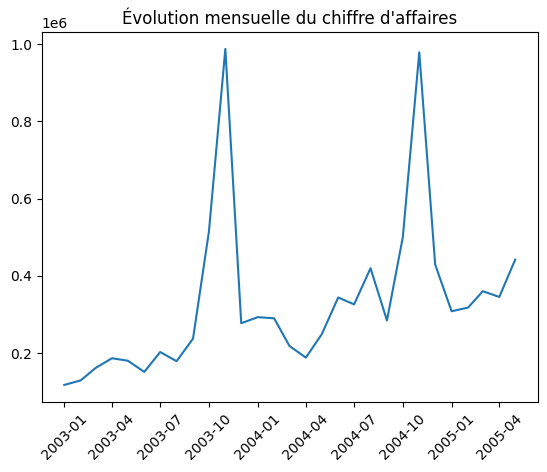

<Figure size 640x480 with 0 Axes>

In [10]:
# =====================================================
# 1. Évolution temporelle des ventes (par mois) 
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Requête SQL
query = """
SELECT 
    DATE_FORMAT(orderDate, '%Y-%m') AS mois,
    SUM(quantityOrdered * priceEach) AS chiffre_affaires
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY mois
ORDER BY mois;
"""

df_sales = pd.read_sql(query, conn)

# Conversion en date
df_sales['mois'] = pd.to_datetime(df_sales['mois'])

# Graphique
plt.figure()
plt.plot(df_sales['mois'], df_sales['chiffre_affaires'])
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.xticks(rotation=45)
plt.show()

# Sauvegarde
plt.savefig("evolution_mensuelle.png")

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/315250488.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_country = pd.read_sql(query, conn)


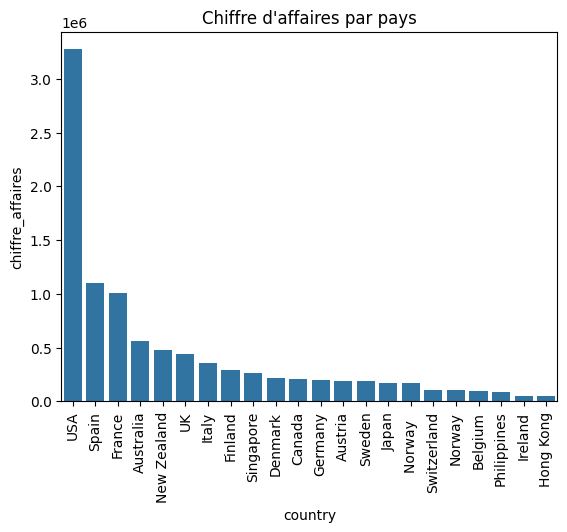

<Figure size 640x480 with 0 Axes>

In [11]:
# ============================================
# 2. Répartition des ventes par pays
# ============================================

query = """
SELECT 
    c.country,
    SUM(od.quantityOrdered * od.priceEach) AS chiffre_affaires
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY c.country
ORDER BY chiffre_affaires DESC;
"""

df_country = pd.read_sql(query, conn)

plt.figure()
sns.barplot(data=df_country, x='country', y='chiffre_affaires')
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires par pays")
plt.show()

plt.savefig("ventes_par_pays.png")

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/2943509409.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(query, conn)


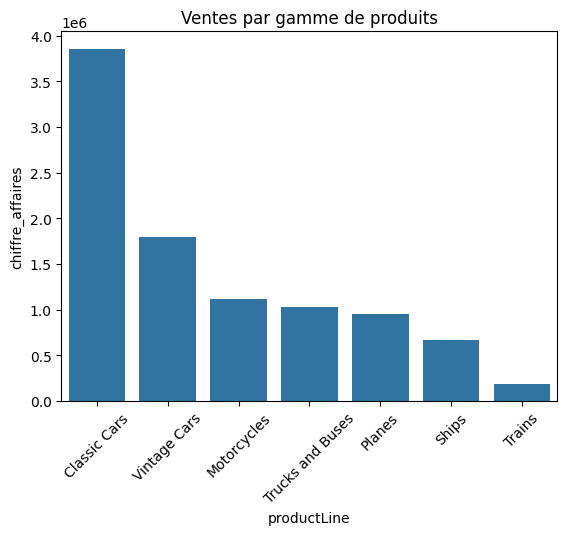

<Figure size 640x480 with 0 Axes>

In [12]:
# ========================================
# 3. Ventes par gamme de produits
# ========================================

query = """
SELECT 
    p.productLine,
    SUM(od.quantityOrdered * od.priceEach) AS chiffre_affaires
FROM products p
JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY p.productLine
ORDER BY chiffre_affaires DESC;
"""

df_products = pd.read_sql(query, conn)

plt.figure()
sns.barplot(data=df_products, x='productLine', y='chiffre_affaires')
plt.xticks(rotation=45)
plt.title("Ventes par gamme de produits")
plt.show()

plt.savefig("ventes_par_gamme.png")

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/2467873291.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10 = pd.read_sql(query, conn)


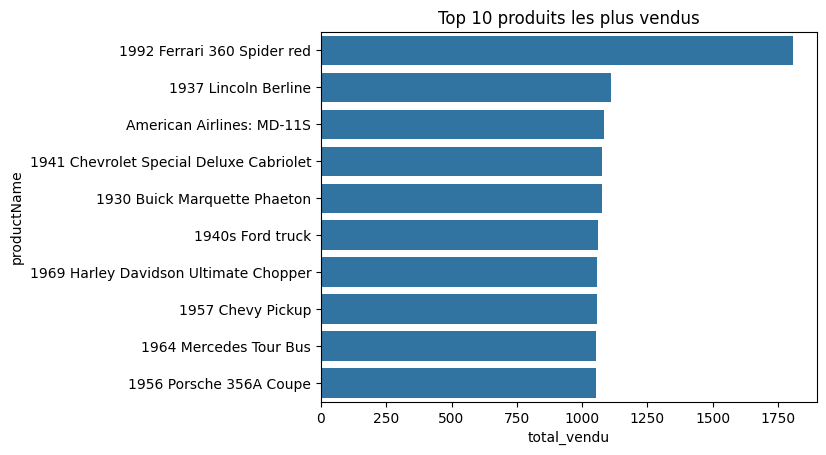

<Figure size 640x480 with 0 Axes>

In [13]:
# ===========================================
# 4. Top 10 produits les plus vendus 
# ===========================================

query = """
SELECT 
    p.productName,
    SUM(od.quantityOrdered) AS total_vendu
FROM products p
JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY p.productName
ORDER BY total_vendu DESC
LIMIT 10;
"""

df_top10 = pd.read_sql(query, conn)

plt.figure()
sns.barplot(data=df_top10, x='total_vendu', y='productName')
plt.title("Top 10 produits les plus vendus")
plt.show()

plt.savefig("top10_produits.png")

In [14]:
# ========================================
# 5. Analyse de l'état des stocks
# ========================================

query_stock = """
SELECT 
    productCode,
    productName,
    quantityInStock
FROM products;
"""

df_stock = pd.read_sql(query_stock, conn)

df_stock.head()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/65691452.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_stock = pd.read_sql(query_stock, conn)


,productCode,productName,quantityInStock
0,S10_1678,1969 Harley Davidson Ultimate Chopper,7933
1,S10_1949,1952 Alpine Renault 1300,7305
2,S10_2016,1996 Moto Guzzi 1100i,6625
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,5582
4,S10_4757,1972 Alfa Romeo GTA,3252


In [15]:
# Identification des catégories de stock

def stock_status(qty):
    if qty == 0:
        return "Rupture"
    elif qty < 500:
        return "Stock faible"
    else:
        return "Stock suffisant"

df_stock["stock_status"] = df_stock["quantityInStock"].apply(stock_status)

In [16]:
# Analyse descriptive & produits problématiques
df_stock["stock_status"].value_counts()

df_problem = df_stock[df_stock["stock_status"] != "Stock suffisant"]
df_problem.sort_values("quantityInStock").head(10)

,productCode,productName,quantityInStock,stock_status
61,S24_2000,1960 BSA Gold Star DBD34,15,Stock faible
6,S12_1099,1968 Ford Mustang,68,Stock faible
90,S32_4289,1928 Ford Phaeton Deluxe,136,Stock faible
85,S32_1374,1997 BMW F650 ST,178,Stock faible
109,S72_3212,Pont Yacht,414,Stock faible


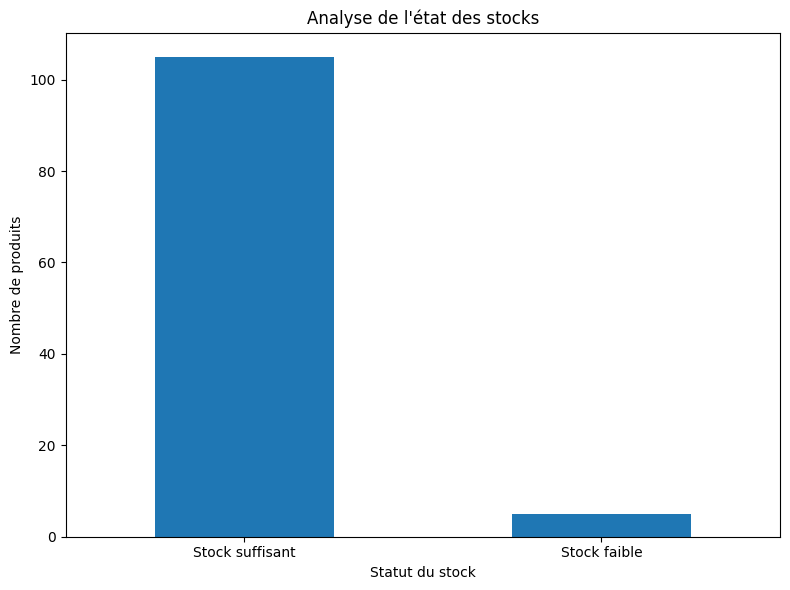

In [17]:
# Visualisation graphique 

plt.figure(figsize=(8,6))
df_stock["stock_status"].value_counts().plot(kind="bar")

plt.title("Analyse de l'état des stocks")
plt.xlabel("Statut du stock")
plt.ylabel("Nombre de produits")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("analyse_stocks.png")
plt.show()

/var/folders/zm/zwf7l6k56_b3wsp1v848_0nw0000gn/T/ipykernel_31657/3555941059.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clients = pd.read_sql(query, conn)


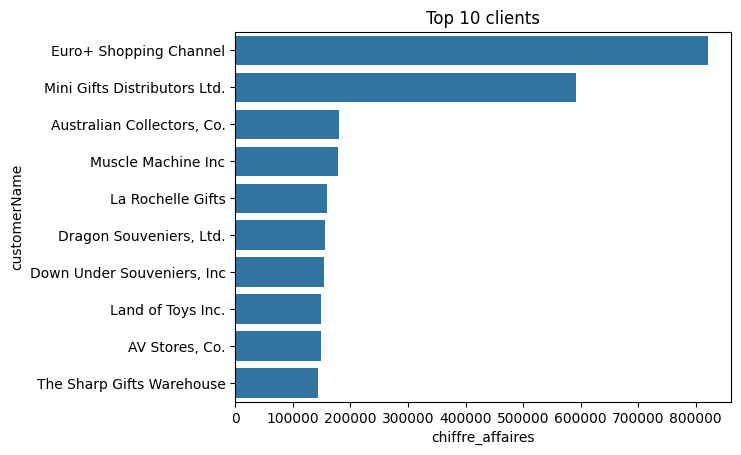

<Figure size 640x480 with 0 Axes>

In [18]:
# ========================================
# 6. Top clients (chiffre d'affairs) 
# ========================================

query = """
SELECT 
    c.customerName,
    SUM(od.quantityOrdered * od.priceEach) AS chiffre_affaires
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY c.customerName
ORDER BY chiffre_affaires DESC
LIMIT 10;
"""

df_clients = pd.read_sql(query, conn)

plt.figure()
sns.barplot(data=df_clients, x='chiffre_affaires', y='customerName')
plt.title("Top 10 clients")
plt.show()

plt.savefig("top_clients.png")